In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [212]:
df = pd.read_csv('train.csv')

In [213]:
df[['cabin_letter','cabin_number','cabin_side']] = df['Cabin'].str.split('/', expand=True)

In [214]:
df[['cabin_letter','cabin_number','cabin_side']] = df[['cabin_letter','cabin_number','cabin_side']].where(df[['cabin_letter','cabin_number','cabin_side']].notna(), np.nan)

In [215]:
df.cabin_number = pd.to_numeric(df['cabin_number'], errors='coerce').astype('Int32')

In [216]:
df[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_letter,cabin_number,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S


In [149]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
cabin_letter    199
cabin_number    199
cabin_side      199
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  cabin_letter  8494 non-null   object 
 15  cabin_number  8494 non-null   Int32  
 16  cabin_side    8494 non-null   object 
dtypes: Int32(1), bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [217]:
X = df.drop(columns=['PassengerId', 'Transported', 'Cabin', 'Name'])
y = df.Transported 

In [218]:
X.CryoSleep = X.CryoSleep * 1
X.VIP = X.VIP * 1
y = y * 1

In [8]:
X.HomePlanet.value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [9]:
X.Cabin.value_counts(dropna=False)

Cabin
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: count, Length: 6561, dtype: int64

In [10]:
X.Destination.value_counts(dropna=False)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

In [11]:
X.Name.value_counts(dropna=False)

Name
NaN                   200
Sus Coolez              2
Elaney Webstephrey      2
Dia Cartez              2
Grake Porki             2
                     ... 
Jamela Griffy           1
Hardy Griffy            1
Salley Mckinn           1
Mall Frasp              1
Propsh Hontichre        1
Name: count, Length: 8474, dtype: int64

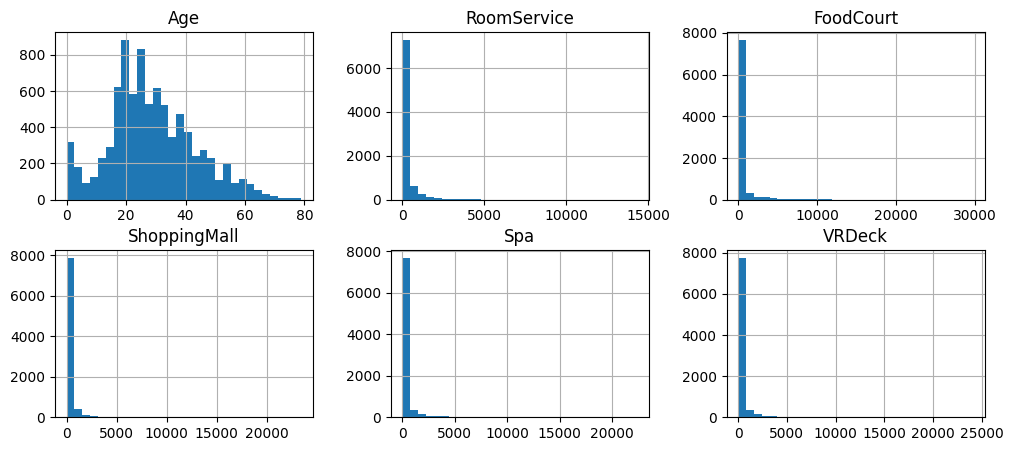

In [17]:
df['Age	RoomService	FoodCourt ShoppingMall Spa VRDeck Name'.split()].hist(layout=(-1, 3), figsize=(12,5), bins=30);

In [219]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
y.value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

In [220]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
cabin_letter    199
cabin_number    199
cabin_side      199
dtype: int64

In [221]:
cat = X_train.select_dtypes(include='object').columns
num = X_train.select_dtypes(exclude='object').columns

In [222]:
for n in num:
    X_train[n] = X_train[n].fillna(X_train[n].median())
    X_test[n] = X_test[n].fillna(X_train[n].median())

for n in cat:
    X_train[n] = X_train[n].fillna(X_train[n].mode()[0])
    X_test[n] = X_test[n].fillna(X_train[n].mode()[0])

C:\Users\user\AppData\Local\Temp\ipykernel_16040\1688609262.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[n] = X_train[n].fillna(X_train[n].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_16040\1688609262.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[n] = X_test[n].fillna(X_train[n].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_16040\1688609262.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) ins

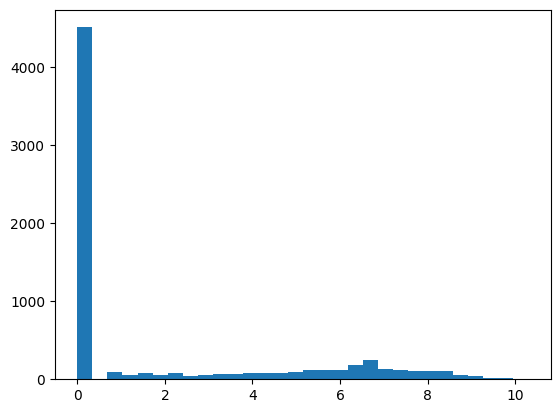

In [33]:
plt.hist(np.log1p(X_train.FoodCourt), bins=30);

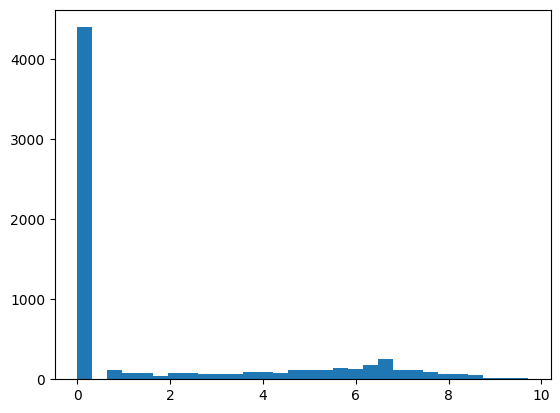

In [36]:
plt.hist(np.log1p(X_train.Spa), bins=30);

In [42]:
X_train[X_train.Spa<1].Spa.unique()

array([0.])

In [69]:
lr = LogisticRegression()
lr.fit(X_train[num], y_train)
pred = lr.predict(X_test[num])
accuracy_score(pred, y_test)

0.7768832662449684

In [194]:
len(X_train)

6954

In [223]:
x_full =  pd.get_dummies(pd.concat([X_train, X_test], axis=0), drop_first=True, dtype=int)

In [224]:
X_train = x_full[:6954]
X_test = x_full[6954:]

In [225]:
sc = StandardScaler()
n1 = sc.fit_transform(X_train[num])
n2 = sc.transform(X_test[num])

In [226]:
X_train[num] = n1
X_test[num] = n2

C:\Users\user\AppData\Local\Temp\ipykernel_16040\3938254385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num] = n1
C:\Users\user\AppData\Local\Temp\ipykernel_16040\3938254385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num] = n2


In [227]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_number,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_side_S
2593,0,-0.346124,0,-0.313221,0.157267,-0.279709,-0.271508,-0.265346,-0.033761,0,0,0,1,0,0,0,0,1,0,0,0
5298,1,-0.975555,0,-0.334593,-0.280213,-0.279709,-0.271508,-0.265346,0.607412,0,0,0,1,0,0,0,0,0,1,0,0
335,0,2.381411,0,-0.334593,0.385355,-0.279709,-0.116442,6.960256,-1.144471,1,0,0,0,0,1,0,0,0,0,0,1
4856,1,-1.744860,0,-0.334593,-0.280213,-0.279709,-0.271508,-0.265346,0.475232,0,0,0,1,0,0,0,0,0,1,0,0
8325,0,-0.835681,0,-0.334593,-0.280213,0.731831,-0.271508,-0.265346,1.664856,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,0,-0.765745,0,-0.334593,-0.267749,1.019667,-0.271508,-0.265346,0.873746,0,0,0,1,0,0,0,0,0,1,0,1
5490,0,-0.136313,0,-0.334593,-0.278966,-0.174444,-0.149041,3.115367,-0.428330,1,0,0,1,0,0,0,1,0,0,0,1
5223,1,-0.695808,0,-0.334593,-0.280213,-0.279709,-0.271508,-0.265346,1.100623,0,1,0,0,0,0,0,0,1,0,0,0
7285,0,0.213371,0,-0.334593,-0.050878,-0.279709,-0.003666,0.388559,1.763498,0,0,0,1,0,0,0,0,1,0,0,1


In [228]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(pred, y_test)

0.7780333525014376

In [230]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy_score(pred, y_test)

0.7843588269120184